# Deep Learning with TensorFlow 2.0 Certification Training
# PROJECT 1

Problem Statement I :
India has been fighting the COVID-19 pandemic since 30 January 2020 when the first case of COVID-19 was reported. With the Unlock 4.0 phase set to begin in September, the need to be proactive is now more than ever. The objective is to create a Real-Time Face Mask Detector which can solve monitoring issues in crowded areas such as Airports, Metros, etc. using CNN and OpenCV

Dataset Description :
The dataset is an artificial set of face mask images 
• Total Images: 1376 
• with_mask images: 
• without_mask images: 
The goal is to create a Deep Learning model to detect in real-time whether a person is wearing a face mask or not

Aim of the Project :
The dataset consists of 1376 images consisting of two classes– with_mask and without_mask. The objective to create a Face Mask Detector using CNN and OpenCV.

# Prepare a detailed python notebook using CNN for detecting Face Masks in Real-time 

## Import Required Libraries

In [1]:
# Import Required Libraries
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense , Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

## Load and Preprocess

Use the dataset at: https://github.com/prajnasb/observations
Download the zip file as: observations-master
Then Extract the files. From those files , zip only the 2 folders (with_mask and without_mask) in a separate folder. 
So, zip the data folder (observations-master\experiements\data) 
We will use this folder name to unzip the files/ pictures. Upload this zip file on google colab.

In [2]:
# Unzip the data
!unzip data_mask.zip

Archive:  data_mask.zip
   creating: data/with_mask/
  inflating: data/with_mask/0-with-mask.jpg  
  inflating: data/with_mask/100-with-mask.jpg  
  inflating: data/with_mask/101-with-mask.jpg  
  inflating: data/with_mask/103-with-mask.jpg  
  inflating: data/with_mask/104-with-mask.jpg  
  inflating: data/with_mask/105-with-mask.jpg  
  inflating: data/with_mask/106-with-mask.jpg  
  inflating: data/with_mask/107-with-mask.jpg  
  inflating: data/with_mask/108-with-mask.jpg  
  inflating: data/with_mask/109-with-mask.jpg  
  inflating: data/with_mask/10-with-mask.jpg  
  inflating: data/with_mask/110-with-mask.jpg  
  inflating: data/with_mask/111-with-mask.jpg  
  inflating: data/with_mask/112-with-mask.jpg  
  inflating: data/with_mask/113-with-mask.jpg  
  inflating: data/with_mask/114-with-mask.jpg  
  inflating: data/with_mask/115-with-mask.jpg  
  inflating: data/with_mask/116-with-mask.jpg  
  inflating: data/with_mask/117-with-mask.jpg  
  inflating: data/with_mask/118-with-m

In [3]:
data_path='data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [4]:
# print the number of images with and without face mask: 
print("The number of images with facemask labelled 'yes':",len(os.listdir('data/with_mask')))
print("The number of images with facemask labelled 'no':",len(os.listdir('data/without_mask')))

The number of images with facemask labelled 'yes': 690
The number of images with facemask labelled 'no': 686


In [5]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to

### Normalize and Resize

In [6]:
# Normalize and Resize the images data
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

# save the numpy array
np.save('data',data)
np.save('target',new_target)

### Visualize

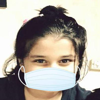

In [8]:
# Visualize the dataset
im =Image.open('data/with_mask/447-with-mask.jpg').resize((100,100))
im 

In [9]:
# load the array:
data=np.load('data.npy')
target=np.load('target.npy')

In [10]:
print(data.shape)
data.shape[1:]

(1376, 100, 100, 1)


(100, 100, 1)

### Split into Test and train

In [11]:
# Split the data into training and test data:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [12]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1100, 100, 100, 1)
(276, 100, 100, 1)
(1100, 2)
(276, 2)


## Model

### Design Model

In [13]:
# Design a Convolutional Neural Network (CNN) Model 
model=Sequential()

#The first CNN layer

#Convolution layer of a kernel size 200
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer

#Convolution layer of a kernel size 100
model.add(Conv2D(100,(3,3)))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())

#Performing Dropout to avoid overfitting
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

### Compile Model

In [15]:
# Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train Model

In [16]:
# Train the Model
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

training=model.fit(train_data,train_target,epochs=20,validation_data=(test_data,test_target ))


Epoch 1/20
35/35 [==============================] - 10s 106ms/step - loss: 0.7751 - accuracy: 0.5000 - val_loss: 0.6553 - val_accuracy: 0.6413
Epoch 2/20
35/35 [==============================] - 3s 85ms/step - loss: 0.6165 - accuracy: 0.6551 - val_loss: 0.5037 - val_accuracy: 0.7826
Epoch 3/20
35/35 [==============================] - 3s 85ms/step - loss: 0.4440 - accuracy: 0.7965 - val_loss: 0.3317 - val_accuracy: 0.8913
Epoch 4/20
35/35 [==============================] - 3s 85ms/step - loss: 0.3516 - accuracy: 0.8593 - val_loss: 0.2655 - val_accuracy: 0.9058
Epoch 5/20
35/35 [==============================] - 3s 85ms/step - loss: 0.3154 - accuracy: 0.8719 - val_loss: 0.2394 - val_accuracy: 0.9094
Epoch 6/20
35/35 [==============================] - 3s 84ms/step - loss: 0.1846 - accuracy: 0.9339 - val_loss: 0.1701 - val_accuracy: 0.9239
Epoch 7/20
35/35 [==============================] - 3s 85ms/step - loss: 0.1556 - accuracy: 0.9480 - val_loss: 0.1454 - val_accuracy: 0.9348
Epoch 8/20


## Visualize Model Performance

### Graphs

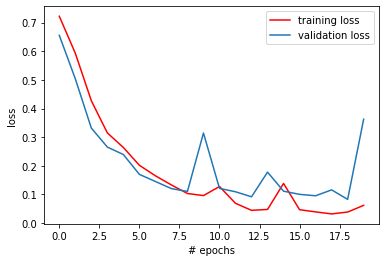

In [18]:
# Performance Graphs:

from matplotlib import pyplot as plt

plt.plot(training.history['loss'],'r',label='training loss')
plt.plot(training.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Evaluate the model

In [19]:
# Evaluate the Model 

print(model.evaluate(test_data,test_target))

9/9 [==============================] - 0s 35ms/step - loss: 0.3627 - accuracy: 0.9058
[0.3627373278141022, 0.9057971239089966]


## Detect the masks using HaarCascade

In [ ]:
labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror
    print(im)

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()